In [1]:
from ScoreOptm import ScoreOptimizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv("example.csv")

In [3]:
sample_matrix = np.asfarray(df.values[:,1:])

In [4]:
scoreOptm = ScoreOptimizer(sample_matrix)

In [5]:
scoreOptm.loss

5*b0**2 + 5*b1**2 + 5*b10**2 + 5*b11**2 + 5*b2**2 + 5*b3**2 + 5*b4**2 + 5*b5**2 + 5*b6**2 + 5*b7**2 + 5*b8**2 + 5*b9**2 + 1600.0*(-0.025*b0 - 0.025*y1 + 1)**2 + 2500.0*(-0.02*b0 - 0.02*y6 + 1)**2 + 3600.0*(-0.0166666666666667*b0 - 0.0166666666666667*y8 + 1)**2 + 4900.0*(-0.0142857142857143*b0 - 0.0142857142857143*y4 + 1)**2 + 8100.0*(-0.0111111111111111*b0 - 0.0111111111111111*y10 + 1)**2 + 2500.0*(-0.02*b1 - 0.02*y3 + 1)**2 + 2500.0*(-0.02*b1 - 0.02*y5 + 1)**2 + 3600.0*(-0.0166666666666667*b1 - 0.0166666666666667*y7 + 1)**2 + 6400.0*(-0.0125*b1 - 0.0125*y0 + 1)**2 + 6400.0*(-0.0125*b1 - 0.0125*y2 + 1)**2 + 3136.0*(-0.0178571428571429*b10 - 0.0178571428571429*y2 + 1)**2 + 4225.0*(-0.0153846153846154*b10 - 0.0153846153846154*y0 + 1)**2 + 4900.0*(-0.0142857142857143*b10 - 0.0142857142857143*y1 + 1)**2 + 5625.0*(-0.0133333333333333*b10 - 0.0133333333333333*y3 + 1)**2 + 5929.0*(-0.012987012987013*b10 - 0.012987012987013*y9 + 1)**2 + 2500.0*(-0.02*b11 - 0.02*y11 + 1)**2 + 4900.0*(-0.0142857

In [6]:
b_updated, y_updated, loss = scoreOptm.gradient_descent(1e-3, 1000, verbose=True)

3891246 60.80714575 79.71190146 71.47714794 60.62362782]
iteration 916 ======================
total loss    : 11831.972165412153
updated score : [58.16328402 58.65479058 64.00913733 61.83308989 73.48516667 54.7527081
 73.1851     65.54441058 60.81267896 79.71749397 71.48275939 60.62919318]
iteration 917 ======================
total loss    : 11831.46846700836
updated score : [58.16874596 58.6602548  64.01462597 61.83853882 73.49071276 54.7582157
 73.19068384 65.54988783 60.81819107 79.72306492 71.48834918 60.63473724]
iteration 918 ======================
total loss    : 11830.968609379128
updated score : [58.17418721 58.66569833 64.02009372 61.84396713 73.49623754 54.76370233
 73.19624613 65.55534427 60.82368215 79.72861439 71.49391739 60.64026009]
iteration 919 ======================
total loss    : 11830.472563236613
updated score : [58.17960784 58.67112123 64.02554064 61.8493749  73.50174108 54.76916807
 73.20178695 65.56078    60.82915229 79.73414247 71.49946411 60.64576179]
iterat

In [13]:
for i in range(len(b_updated)):
    print("b%d: %.2f \t y%d: %.2f" % (i+1, b_updated[i], i+1, y_updated[i]))    

b1: -2.84 	 y1: 58.56
b2: 1.50 	 y2: 59.05
b3: -8.05 	 y3: 64.40
b4: 2.41 	 y4: 62.23
b5: 5.44 	 y5: 73.88
b6: -2.80 	 y6: 55.15
b7: 2.71 	 y7: 73.59
b8: -1.11 	 y8: 65.94
b9: 0.77 	 y9: 61.21
b10: 4.85 	 y10: 80.12
b11: 1.99 	 y11: 71.88
b12: 2.91 	 y12: 61.03


In [10]:
origin_mean_scores = scoreOptm.caculate_original_mean_score()
print("original mean score --- true score:\n")
for i in range(len(origin_mean_scores)):
    print("%.2f --- %.2f" % (origin_mean_scores[i], y_updated[i]))

original mean score --- true score:

61.00 --- 58.56
61.00 --- 59.05
65.20 --- 64.40
64.00 --- 62.23
74.00 --- 73.88
54.80 --- 55.15
72.00 --- 73.59
69.00 --- 65.94
62.80 --- 61.21
81.40 --- 80.12
71.40 --- 71.88
63.00 --- 61.03


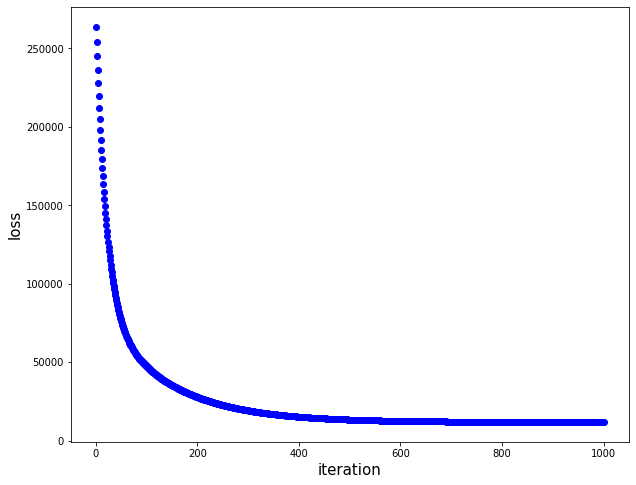

In [9]:
# plot loss per iteration.

loss = scoreOptm.history
iter = [i+1 for i in range(len(loss))]

plt.figure(figsize = (10,8))
plt.xlabel('iteration', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.plot(iter, loss, 'bo')
plt.show()